# The Sparks Foundation Oct-2021
## Data Science And Business Analytics Intern
### Author Name: Manthan Nagpurkar
### Task 2: Prediction using Unsupervised ML

In [1]:
# Import Libraries
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load Dataset
df = pd.read_csv("IRIS.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df.shape

(150, 5)

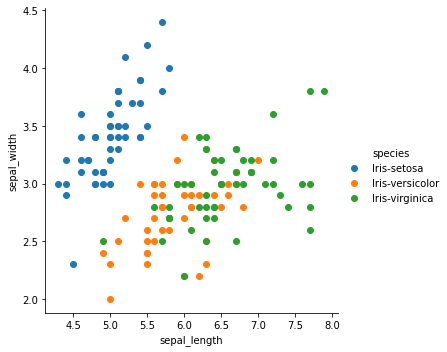

In [8]:
# Bivariate Analysis
sns.FacetGrid(df, hue='species', height=5).map(plt.scatter, 'sepal_length', 'sepal_width').add_legend();

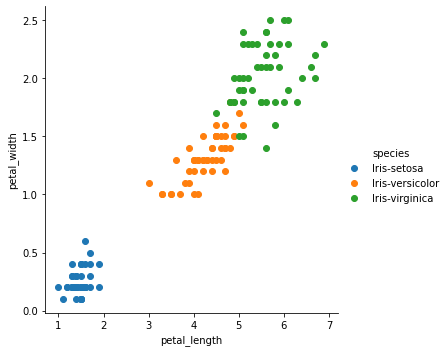

In [9]:
sns.FacetGrid(df, hue='species', height=5).map(plt.scatter, 'petal_length', 'petal_width').add_legend()

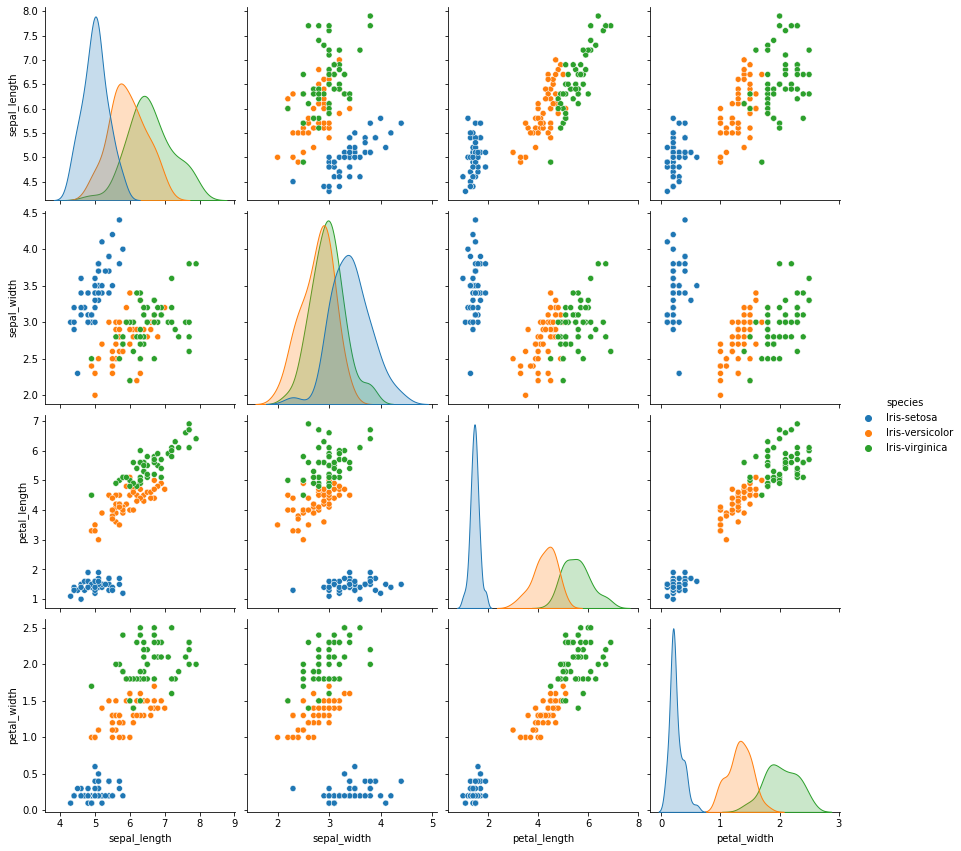

In [10]:
# Multivariate Analysis
sns.pairplot(df, hue='species', height=3)

In [11]:
# Preparing the data
X = df.iloc[:,:-1].values
y = df.iloc[:,-1]

In [12]:
# Split the data into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
# Optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
a = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    a.append(kmeans.inertia_)

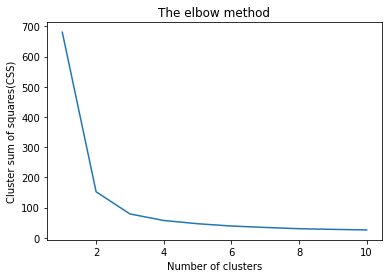

In [14]:
# Plotting the results on the graph
# The elbow method
plt.plot(range(1,11), a)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster sum of squares(CSS)')
plt.show()

In [15]:
# Applying kmeans to the dataset
# Here optimal cluster k is 3
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_pred = kmeans.fit_predict(X)

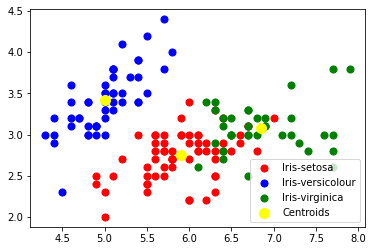

In [16]:
# Visualation of clusters
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()